In [1]:
# K Nearest Neighbor Application

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('data.csv')
print (len(dataset))
dataset.head()

303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
zero_not_accepted=["age","trestbps","chol","thalach","oldpeak","slope"]
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)
    

In [4]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,1.0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,1.0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1.0,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1.0,0,2,1
7,44,1,1,120,263,0,1,173,0,1.0,2.0,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2.0,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2.0,0,2,1


In [5]:
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,1.0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1.0,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1.0,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1.0,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1.0,1,2
302,57,0,1,130,236,0,0,174,0,1.0,1.0,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2.0,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2.0,0,2


In [6]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
X_test

array([[ 1.87528580e+00,  6.21581561e-01, -1.01006076e+00,
         7.38067738e-01, -1.57231830e+00, -4.16025147e-01,
         8.91132789e-01, -1.09707537e+00,  1.54560308e+00,
         1.65493386e+00, -8.61891607e-01, -7.45049451e-01,
         1.06436231e+00],
       [ 1.23443183e+00,  6.21581561e-01,  2.12283957e+00,
         2.04685065e+00, -3.86846038e-01, -4.16025147e-01,
        -1.12216722e+00,  2.78025949e-01, -6.46996639e-01,
        -8.10291183e-01, -8.61891607e-01, -7.45049451e-01,
         1.06436231e+00],
       [ 7.00386852e-01,  6.21581561e-01,  2.12283957e+00,
         2.04685065e+00,  9.77565437e-01, -4.16025147e-01,
        -1.12216722e+00,  4.61372791e-01, -6.46996639e-01,
        -1.30333619e+00, -8.61891607e-01, -7.45049451e-01,
         1.06436231e+00],
       [ 8.07195847e-01,  6.21581561e-01, -1.01006076e+00,
        -3.08958588e-01,  3.06543400e-01, -4.16025147e-01,
        -1.12216722e+00, -3.63687998e-01,  1.54560308e+00,
         1.90145637e+00, -8.61891607e

In [7]:
# k value

import math
print (math.sqrt(len(X)))
classifier=KNeighborsClassifier(n_neighbors=27, metric='euclidean')
classifier.fit(X_train,y_train) 

17.406895185529212


KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [8]:
# prediction on test data

y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred),

(array([[17, 10],
        [ 2, 32]], dtype=int64),)

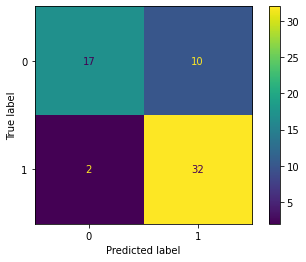

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [11]:
print (accuracy_score(y_test,y_pred))

0.8032786885245902


In [12]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17, 10],
       [ 2, 32]], dtype=int64)

In [13]:
cm[0][0]/(cm[0][0]+cm[1][0])

0.8947368421052632

In [14]:
cm[1][1]/(cm[1][1]+cm[0][1])

0.7619047619047619

In [15]:
cm[0][0] / (cm[0][0]+cm[0][1])

0.6296296296296297